The SK model:
### Sherrington–Kirkpatrick (SK) Spin Glass Model

The Hamiltonian of the Sherrington–Kirkpatrick model is

$$
\mathcal{H}_N(\boldsymbol{\sigma})
= - \sum_{1 \le i < j \le N} J_{ij}\,\sigma_i \sigma_j
\;-\;
\sum_{i=1}^{N} h_i\,\sigma_i ,
$$

where the terms are defined as follows:

- $\sigma_i \in \{+1,-1\}$ are **Ising spins**, representing binary degrees of freedom.
- $J_{ij}$ are **quenched random couplings** between spins $i$ and $j$, drawn independently from a Gaussian distribution
  $$
  J_{ij} \sim \mathcal{N}\!\left(0,\frac{J^2}{N}\right),
  $$
  often with $J^2 = 1$.
- The scaling $1/N$ ensures a **well-defined thermodynamic limit**, so that the total energy is extensive (of order $N$).
- $h_i$ is an **external field** acting on spin $i$ (often taken as $h_i = h$ or $h_i = 0$).
- The first term encodes **frustrated interactions** due to random signs of $J_{ij}$.
- The second term biases spins toward alignment with the external field.

The SK model is a **mean-field spin glass**, meaning every spin interacts with every other spin with random strength.


### The Transformer architecture and its components

### High-level Thesis Vision

This thesis investigates a two-way bridge between spin glass theory and transformer models:

Forward direction (Goal I):
Use transformers as learned statistical models to approximate and simulate equilibrium properties of spin glasses.

Reverse direction (Goal II):
Use spin-glass concepts (overlaps, Gibbs measures, replica symmetry breaking, free energy) to develop new tools for interpretability and intervention in transformers.

The unifying idea is that both systems are large, high-dimensional, disordered systems whose macroscopic behavior is better described by distributions over states than by individual parameters.

Goal 1 : do MCMC sampling to generate the data which will train the transformer, see if QKD dot product is closest to normalized h_eff_i ( which is the effective field acting on spin i due to the configuration from other spins  its normalized version give you P ( sigma_i given rest of the configuration)), How accurately does it predict ground state properties such as free Energy, magnetization etc )
h_eff can be calculated directly for small N 

Attention is simply normalized dot product , probability of sigma_i given config is normalized h_eff times some constant, so they have to be analgous 

Goal 2: Can Spin Glass ideas such as ultrametricity, Replica Symmetry Breaking , TAP equations, cavity method, improve interpretability and intervenability in Transformers. 

In [5]:
pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   -------------------- ------------------- 4.2/8.3 MB 21.8 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 26.5 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 35.5 MB/s  0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import sys; sys.executable

'c:\\Users\\MridulKC\\AppData\\Local\\Python\\pythoncore-3.14-64\\python.exe'

In [6]:

%pip install --upgrade pip
%pip install matplotlib
%pip install scipy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached scipy-1.17.0-cp314-cp314-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.17.0-cp314-cp314-win_amd64.whl (37.1 MB)
Note: you may need to restart the kernel to use updated packages.


### Goal 1:

In [1]:
# ============================================================
# Spin Glass ↔ Transformer Raw-QK Alignment Experiment
# ============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# ============================================================
# DEVICE
# ============================================================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda



===== N = 10 =====
  beta = 5
Spearman = -0.872462 | 
  beta = 10
Spearman = -1.000000 | 
  beta = 15
Spearman = 1.000000 | 
  beta = 19
Spearman = 1.000000 | 

===== N = 30 =====
  beta = 5
Spearman = 0.341575 | 
  beta = 10
Spearman = -0.984236 | 
  beta = 15


C:\Users\MridulKC\AppData\Local\Temp\ipykernel_31596\3390465590.py:146: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman, p_value = spearmanr(h_vals, qk_sum_vals)


Spearman = nan | 
  beta = 19
Spearman = -1.000000 | 

===== N = 50 =====
  beta = 5
Spearman = 0.645632 | 
  beta = 10
Spearman = 1.000000 | 
  beta = 15
Spearman = -0.903135 | 
  beta = 19
Spearman = -0.310345 | 

===== N = 70 =====
  beta = 5
Spearman = 0.504106 | 
  beta = 10
Spearman = 0.393550 | 
  beta = 15
Spearman = 0.319205 | 
  beta = 19
Spearman = 0.904933 | 

===== N = 90 =====
  beta = 5
Spearman = 0.708964 | 
  beta = 10
Spearman = 0.422228 | 
  beta = 15
Spearman = -0.760663 | 
  beta = 19
Spearman = 0.860091 | 
min(h) = 0.7446160912513733 max(h) = 0.8452827334403992 std(h) = 0.027526298442604496
min(h) = 0.7446160912513733 max(h) = 0.8452827334403992 std(h) = 0.027526298442604496
min(h) = 0.7446160912513733 max(h) = 0.8452827334403992 std(h) = 0.027526298442604496
min(h) = 0.7446160912513733 max(h) = 0.8452827334403992 std(h) = 0.027526298442604496
min(h) = 0.7446160912513733 max(h) = 0.8452827334403992 std(h) = 0.027526298442604496


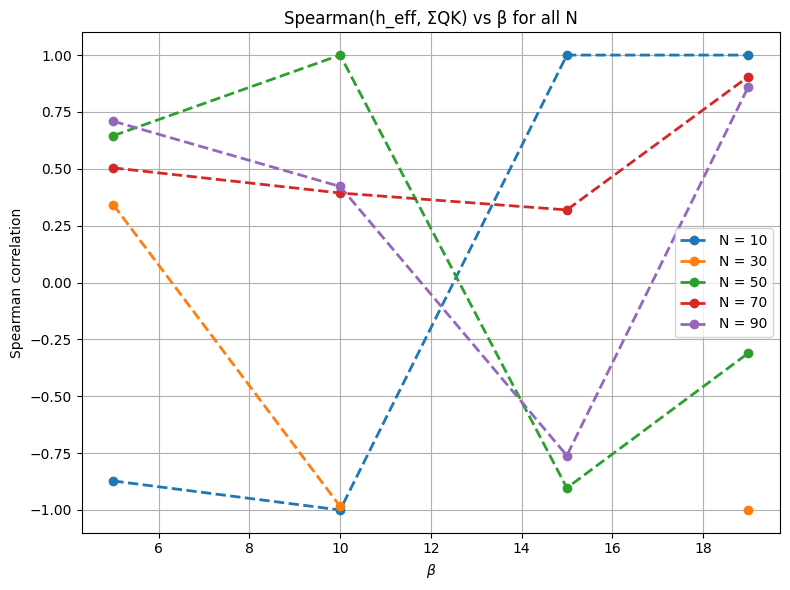

Using device: cuda

===== N = 10 =====
Target site i0 = 6
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 11 =====
Target site i0 = 3
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 12 =====
Target site i0 = 8
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 13 =====
Target site i0 = 5
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 14 =====
Target site i0 = 7
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 15 =====
Target site i0 = 12
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 16 =====
Target site i0 = 10
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 17 =====
Target site i0 = 16
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 18 =====
Target site i0 = 4
  beta = 0.5
  beta = 1.0
  beta = 2.0
  beta = 4.0
  beta = 5.0

===== N = 19 =====
Target site i0 = 9
  b

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\venvs\torch_cuda\Scripts\python.exe -m pip install --upgrade pip' command.


Using device: cuda

===== N = 10 =====
  beta = 0
  beta = 25
  beta = 50
  beta = 75
  beta = 100

===== N = 30 =====
  beta = 0
  beta = 25
  beta = 50
  beta = 75
  beta = 100

===== N = 50 =====
  beta = 0
  beta = 25
  beta = 50
  beta = 75
  beta = 100

===== N = 70 =====
  beta = 0
  beta = 25
  beta = 50
  beta = 75
  beta = 100

===== N = 80 =====
  beta = 0
  beta = 25
  beta = 50
  beta = 75
  beta = 100


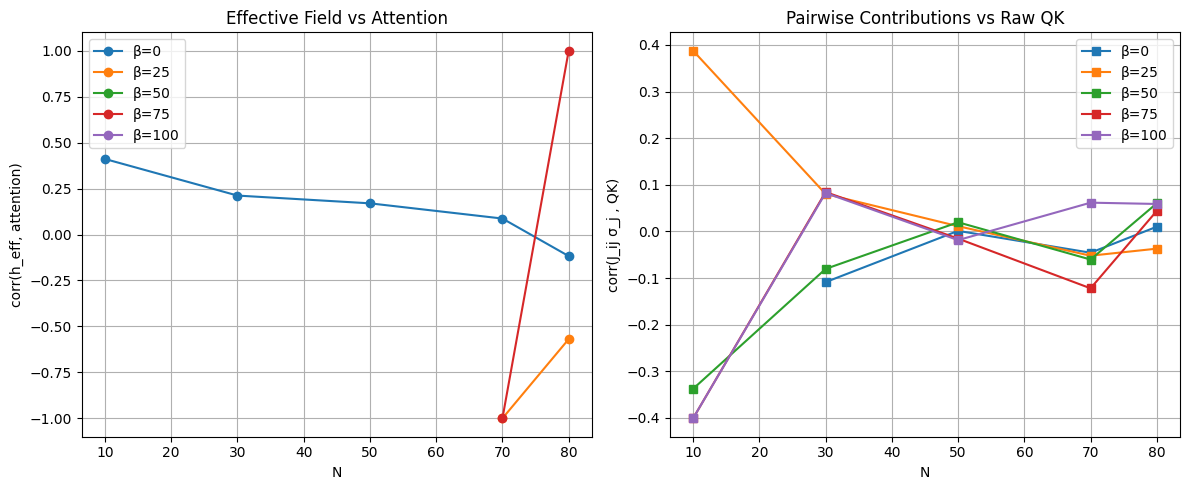

In [ ]:
# ============================================================
# METROPOLIS SAMPLER (SK MODEL)
# ============================================================

def metropolis_step(sigma, J, beta):
    """
    Perform a single Metropolis–Hastings spin-flip step for the
    Sherrington–Kirkpatrick (SK) spin glass model.

    Args:
        sigma (torch.Tensor): Shape (N,). Current spin configuration with
            entries in {+1, -1} on the same device as `J`.
        J (torch.Tensor): Shape (N, N). Symmetric coupling matrix with
            zero diagonal (J_ii = 0). Typically scaled as O(1/sqrt(N)).
        beta (float): Inverse temperature β = 1/T controlling acceptance
            of energetically unfavorable flips. Larger β ⇒ lower temperature.

    Returns:
        torch.Tensor: The (possibly) updated spin configuration `sigma`
        after proposing and accepting/rejecting a flip at a single site.

    Role in experiment:
        - This is the inner dynamics that generates samples from the
          SK equilibrium distribution at fixed β. The Transformer is trained
          on those samples to predict the spin at a held-out site from the rest.
    """
    # Randomly choose a site to propose a flip
    i = random.randrange(len(sigma))

    # Effective local field h_i = Σ_j J_{ij} σ_j
    h_eff_i = torch.dot(J[i], sigma)

    # Energy change for flipping σ_i → -σ_i is ΔE = 2 σ_i h_i
    delta_E = 2 * sigma[i] * h_eff_i

    # Metropolis acceptance: always accept if ΔE <= 0; otherwise accept with exp(-βΔE)
    if delta_E <= 0 or random.random() < math.exp(-beta * delta_E):
        sigma[i] *= -1

    return sigma


def sample_equilibrium(J, beta, steps=15000, burn_in=4000, thinning=20):
    """
    Run the Metropolis sampler to draw (approximately) equilibrium spin
    configurations for the SK model at inverse temperature β.

    Args:
        J (torch.Tensor): Shape (N, N). Symmetric coupling matrix with J_ii = 0.
        beta (float): Inverse temperature.
        steps (int, optional): Total Metropolis steps to run. Default: 15000.
        burn_in (int, optional): Initial steps discarded to reach equilibrium.
            Default: 4000.
        thinning (int, optional): Keep one sample every `thinning` steps to
            reduce autocorrelation. Default: 20.

    Returns:
        torch.Tensor: Shape (M, N) where M ≈ (steps - burn_in) / thinning.
            A batch of thinned configurations drawn from the equilibrium
            distribution at the specified β.

    Role in experiment:
        - Produces the training/evaluation dataset: each sample is an SK spin
          configuration from which we ask the Transformer to predict the spin
          at a designated site from the remaining spins.
    """
    N = J.shape[0]

    # Random ±1 initialization on the same device as J (assumes `device` exists)
    sigma = (torch.randint(0, 2, (N,), device=device) * 2 - 1).float()

    samples = []
    for t in range(steps):
        sigma = metropolis_step(sigma, J, beta)

        # Collect thinned post–burn-in samples
        if t > burn_in and t % thinning == 0:
            samples.append(sigma.clone())

    return torch.stack(samples)


# ============================================================
# TRANSFORMER
# ============================================================

class SpinTransformer(nn.Module):
    """
    Minimal Transformer-like model that maps a vector of spins to per-site
    logits (binary classification) for predicting σ_i \in {−1, +1}.

    Architecture:
        - Linear embedding from 1-dim input (each spin) to d_model
        - Single Multihead Self-Attention layer (batch_first=True)
        - Feed-forward linear layer
        - Final linear classifier to 2 logits per site

    Intended usage in experiment:
        - Given an input spin configuration where one site (SITE) is masked
          (set to 0), the model tries to infer the held-out spin value by
          attending to the rest of the configuration. We then probe the model’s
          internal QK interactions to compare with the SK effective field.

    Args:
        d_model (int, optional): Embedding/attention hidden size. Default: 64.
    """
    def __init__(self, d_model=64):
        super().__init__()
        self.embed = nn.Linear(1, d_model)                     # per-spin embedding
        self.attn = nn.MultiheadAttention(d_model, 4, batch_first=True)  # self-attention
        self.ff = nn.Linear(d_model, d_model)                  # simple FF layer
        self.classifier = nn.Linear(d_model, 2)                # 2-class logits per site

    def forward(self, x):
        """
        Forward pass.

        Args:
            x (torch.Tensor): Shape (B, N). Batch of spin configurations
                (float tensor). The site to be predicted (SITE) is masked to 0.

        Returns:
            torch.Tensor: Shape (B, N, 2). For each site in the sequence,
                returns logits over the two classes {σ_i = -1, σ_i = +1}.

        Role in experiment:
            - During training, we read out logits[:, SITE] and apply cross-entropy
              against the true label for the masked site.
            - During analysis, we access attention internals (Q, K) to build a
              physics–ML correspondence between Σ_j J_{ij} σ_j and Σ_j Q_i·K_j.
        """
        # (B, N) → (B, N, 1) → (B, N, d_model)
        x = self.embed(x.unsqueeze(-1))

        # Self-attention (batch_first=True). We ignore the attention weights here.
        attn_out, _ = self.attn(x, x, x)

        # Residual-like path using the attention-induced delta (centered per sequence)
        delta = attn_out - x
        delta -= delta.mean(dim=1, keepdim=True)  # zero-mean across sites
        x = x + delta

        # Simple feed-forward projection and per-site classification
        x = self.ff(x)
        return self.classifier(x)


# ============================================================
# PARAMETERS
# ============================================================

N_values = [10, 30, 50, 70, 90]
beta_values = [5, 10, 15, 19]  # Phase transition behavior: empirical signs near β≈20 (not used directly here)

batch_size = 128
lr = 1e-3
SITE = 5         # Held-out index to predict. NOTE: must be < N for each setting.

results = {}


# ============================================================
# MAIN EXPERIMENT
# ============================================================
# For each system size N:
#   1) Draw an SK coupling matrix J ~ N(0, 1/N) symmetric, zero diag.
#   2) For each β, sample equilibrium spin configurations via Metropolis.
#   3) Build a dataset where the target is σ[SITE] and input masks that site to 0.
#   4) Train SpinTransformer to predict σ[SITE] from the rest.
#   5) Probe internal attention QK signals vs physical effective field h_i to
#      compute Spearman correlation across samples.

for N in N_values:
    epochs = int(5 * N)  # simple scaling of training epochs with system size

    print(f"\n===== N = {N} =====")
    results[N] = []

    # SK random couplings: symmetric, zero diagonal, variance 1/N
    J = torch.randn(N, N, device=device) / math.sqrt(N)
    J = (J + J.T) / 2
    J.fill_diagonal_(0)

    for beta in beta_values:
        print(f"  beta = {beta}")

        # --- Sampling from SK equilibrium at this β ---
        samples = sample_equilibrium(J, beta)

        # --- Dataset: mask SITE in input; label is σ[SITE] ---
        X, Y = [], []
        for s in samples:
            x = s.clone()
            y = s[SITE]               # true spin at held-out site
            x[SITE] = 0.0             # mask the site in the input
            X.append(x)
            Y.append(0 if y == -1 else 1)  # map {-1, +1} → {0, 1} for CE loss

        X = torch.stack(X).to(device)       # (M, N)
        Y = torch.tensor(Y, device=device)  # (M,)

        # --- Model / optimizer / loss ---
        model = SpinTransformer().to(device)
        opt = optim.Adam(model.parameters(), lr=lr)
        loss_fn = nn.CrossEntropyLoss()

        # --- Training loop (minibatched) ---
        for _ in range(epochs):
            perm = torch.randperm(len(X))
            for k in range(0, len(X), batch_size):
                idx = perm[k:k + batch_size]
                logits = model(X[idx])[:, SITE]  # read out logits for the held-out site
                loss = loss_fn(logits, Y[idx])
                opt.zero_grad()
                loss.backward()
                opt.step()

        # ====================================================
        # MEASUREMENTS: h_eff vs RAW QK
        # ====================================================
        # Compare physics effective field h_i = Σ_j J_{ij} σ_j at SITE
        # with the model's raw attention similarity Σ_j (Q_i · K_j) / sqrt(d)
        # (excluding self-site). We compute Spearman correlation across samples.

        h_vals = []
        qk_sum_vals = []
        pairwise_corrs = []  # optional diagnostic: corr per-site between J_{i·}σ and Q_i·K_·

        with torch.no_grad():
            for sigma in samples[:60]:  # analyze a subset for speed
                sigma = sigma.to(device)

                # --- Physics: effective field and pairwise term at SITE ---
                h_i = torch.dot(J[SITE], sigma)  # scalar effective field at SITE
                h_vals.append(h_i.item())
                phys_pairwise = J[SITE] * sigma  # vector of J_{i·} σ_·
                phys_pairwise[SITE] = 0.0        # ignore self

                # --- Transformer internals: extract raw Q and K ---
                x = model.embed(sigma.unsqueeze(0).unsqueeze(-1))  # (1, N, d)
                d = model.attn.embed_dim
                W = model.attn.in_proj_weight  # (3d, d) concatenated [Q; K; V]
                W_Q, W_K = W[:d], W[d:2*d]     # split out Q and K projection matrices

                Q = x @ W_Q.T                  # (1, N, d)
                K = x @ W_K.T                  # (1, N, d)



In [4]:
%pip install scipy.stats 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats
You should consider upgrading via the 'd:\venvs\torch_cuda\Scripts\python.exe -m pip install --upgrade pip' command.


Using device: cuda

===== N = 10 =====
  beta = 5
Spearman = -0.255743 | 
  beta = 10
Spearman = -0.199418 | 
  beta = 15
Spearman = 0.313501 | 
  beta = 19
Spearman = -0.743590 | 

===== N = 30 =====
  beta = 5
Spearman = 0.687543 | 
  beta = 10
Spearman = 0.627119 | 
  beta = 15
Spearman = -0.641750 | 
  beta = 19


C:\Users\Acer\AppData\Local\Temp\ipykernel_17644\842912002.py:164: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman, p_value = spearmanr(h_vals, qk_sum_vals)


Spearman = nan | 

===== N = 50 =====
  beta = 5
Spearman = -0.000656 | 
  beta = 10
Spearman = -0.286846 | 
  beta = 15
Spearman = 0.199818 | 
  beta = 19
Spearman = nan | 

===== N = 70 =====
  beta = 5
Spearman = 0.372398 | 
  beta = 10
Spearman = -0.580025 | 
  beta = 15
Spearman = 1.000000 | 
  beta = 19
Spearman = nan | 

===== N = 90 =====
  beta = 5
Spearman = 0.573848 | 
  beta = 10
Spearman = 0.993169 | 
  beta = 15
Spearman = -0.875137 | 
  beta = 19
Spearman = -0.015773 | 
min(h) = -1.0621371269226074 max(h) = -0.7963289618492126 std(h) = 0.07932101055156646


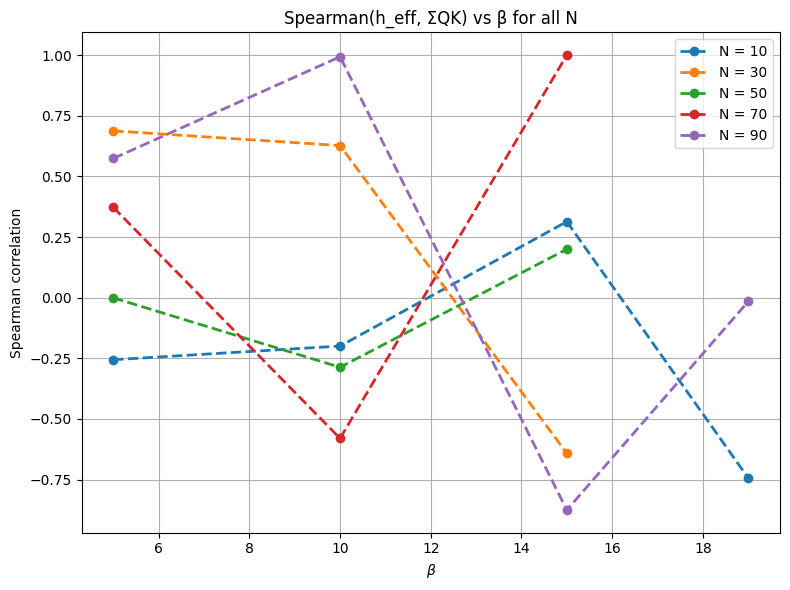